In [1]:
names=["back0","biceps0","triceps0","chest0","back1","biceps1","triceps1","chest1"]
classes=[0,1,2,3,0,1,2,3]

name_classes=["back","biceps","triceps","chest"]
incT=50
incT2=incT*5

winIndSize=list(range(-39,1,1))

print(winIndSize, "#", len(winIndSize))



[-39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0] # 40


In [2]:
import numpy as np
from pandas import read_csv    

import time

from datetime import datetime
from numpy import mean



X=[]
Y=[]
Z=[]
L=[]
TT=[]
C=[]




incT0=0
N=0
for iname,name in enumerate(names):
    
    
    series=read_csv(name+".tsv", sep="\t",parse_dates=False)
    Ylabel=read_csv(name+".L.tsv", sep="\t",parse_dates=False)

    print(series.values)
            
    TY=np.array(Ylabel["timestamp"])
    LY=np.array(Ylabel["label"])

    print("TL0:",TY)
    print("LY0:",LY)


    lastT=-1
    for i in range(0,len(TY)):
        if(LY[i]==0 or LY[i]==-1):
            TY[i]=TY[i]+lastT
            lastT=TY[i]
        if(LY[i]==1):
            lastT=TY[i]
        if(LY[i]==-1):
            lastT=-1

    print("TL:",TY)
    print("LY:",LY)

    T=np.array(series["timestamp"])

    t0=T[0]
    tY0=TY[0]
    tN=T[-1]
    print(t0,tN)

    tY0=int(tY0/incT)*incT
    t0=int(t0/incT)*incT
    tN=int(tN/incT)*incT

    print("TIMES:",t0,tN, (int)(tN-t0)/1000)


    v0=0
    sesion=False
    for ti in range(t0,tN,incT2):
        print("ti:",ti, ti-t0)

        i=np.where( (TY>=ti-t0) & (TY<=ti+incT-t0))
        print("i2:",i[0], "LY:",LY[i[0]])

        if(len(i[0])>0):
            l=LY[i[0][0]]
            if(l==1):
                v0=0
                sesion=True
            if(l==-1):
                v0=0
                sesion=False    
            if(l==0):
                v0=0


        if(sesion):
            v0=v0+0.01
            print("v0:",v0)
            L.append(v0)
        else:
            L.append(-1)


        i=np.where( (T>=ti) & (T<=ti+incT))
        print(i)
        print(series.values[i])

        x0=mean(series.values[i][:,0])
        y0=mean(series.values[i][:,1])
        z0=mean(series.values[i][:,2])
        
        print("x0",x0,"y0",y0,"z0",z0)
        #print("X",X,"Y",Y,"Z",Z)

        if(sesion):
            X.append(x0)
            Z.append(z0)
            Y.append(y0)         
        else:
            X.append(x0)
            Z.append(z0)     
            Y.append(y0)         
        #print(x0,y0,z0)    



        TT.append(ti-t0+incT0)
        C.append(classes[iname])
        N=N+1
    incT0=incT0+ti-t0

[[ 7.00000000e-01  3.90000000e+00  7.50000000e+00  1.68840200e+12]
 [ 1.20000000e+00  5.50000000e+00  7.70000000e+00  1.68840200e+12]
 [ 1.80000000e+00  5.50000000e+00  8.20000000e+00  1.68840200e+12]
 ...
 [-6.00000000e-01 -3.40000000e+00  8.70000000e+00  1.68840219e+12]
 [-7.00000000e-01 -3.10000000e+00  9.20000000e+00  1.68840219e+12]
 [-1.40000000e+00 -1.30000000e+00  1.00000000e+01  1.68840219e+12]]
TL0: [ 29500   2500   2500   2000   2000   2500   2000   2000   2000   2500
   2500    500  67000   3000   2500   2000   2000   2500   2000   2000
   2000   2500   2000    500 107000   3000   2500   2000   2000   2500
   2000   2000   2000   2500   2000    500 151500   3000   2500   2000
   2000   2500   2000   2000   2500   2000   2000    500]
LY0: [ 1  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0 -1
  1  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0 -1]
TL: [ 29500  32000  34500  36500  38500  41000  43000  45000  47000  49500
  52000  52500  67

[[ 8.10000000e+00 -6.70000000e+00 -1.40000000e+00  1.68840215e+12]
 [ 7.90000000e+00 -5.90000000e+00 -1.00000000e+00  1.68840215e+12]
 [ 7.30000000e+00 -5.50000000e+00 -3.00000000e-01  1.68840215e+12]]
x0 7.766666666666667 y0 -6.033333333333334 z0 -0.8999999999999999
ti: 1688402147050 143000
i2: [] LY: []
(array([7150, 7151], dtype=int64),)
[[ 9.30000000e+00 -4.80000000e+00  6.00000000e-01  1.68840215e+12]
 [ 1.04000000e+01 -5.10000000e+00  4.00000000e-01  1.68840215e+12]]
x0 9.850000000000001 y0 -4.949999999999999 z0 0.5
ti: 1688402147300 143250
i2: [] LY: []
(array([7162, 7163, 7164], dtype=int64),)
[[ 9.90000000e+00 -2.50000000e+00 -1.00000000e-01  1.68840215e+12]
 [ 9.70000000e+00 -2.90000000e+00 -1.00000000e-01  1.68840215e+12]
 [ 9.40000000e+00 -2.90000000e+00 -6.00000000e-01  1.68840215e+12]]
x0 9.666666666666666 y0 -2.766666666666667 z0 -0.26666666666666666
ti: 1688402147550 143500
i2: [] LY: []
(array([7175, 7176], dtype=int64),)
[[ 7.90000000e+00 -4.60000000e+00 -9.00000000e-

x0 3.55 y0 -3.2 z0 -12.75
ti: 1687877772700 91500
i2: [] LY: []
v0: 0.05
(array([4574, 4575, 4576], dtype=int64),)
[[ 8.20000000e+00 -4.30000000e+00 -9.80000000e+00  1.68787777e+12]
 [ 7.80000000e+00 -4.00000000e+00 -9.80000000e+00  1.68787777e+12]
 [ 7.70000000e+00 -4.70000000e+00 -9.10000000e+00  1.68787777e+12]]
x0 7.8999999999999995 y0 -4.333333333333333 z0 -9.566666666666668
ti: 1687877772950 91750
i2: [] LY: []
v0: 0.060000000000000005
(array([4587, 4588], dtype=int64),)
[[ 8.90000000e+00 -4.20000000e+00 -6.00000000e+00  1.68787777e+12]
 [ 8.10000000e+00 -3.60000000e+00 -5.30000000e+00  1.68787777e+12]]
x0 8.5 y0 -3.9000000000000004 z0 -5.65
ti: 1687877773200 92000
i2: [] LY: []
v0: 0.07
(array([4599, 4600, 4601], dtype=int64),)
[[ 9.10000000e+00 -4.20000000e+00 -7.40000000e+00  1.68787777e+12]
 [ 8.80000000e+00 -3.60000000e+00 -6.20000000e+00  1.68787777e+12]
 [ 9.20000000e+00 -4.30000000e+00 -7.10000000e+00  1.68787777e+12]]
x0 9.033333333333333 y0 -4.033333333333334 z0 -6.9000

x0 6.133333333333333 y0 7.666666666666667 z0 -2.3
ti: 1688399216900 24500
i2: [] LY: []
v0: 0.07
(array([1224, 1225, 1226], dtype=int64),)
[[ 6.10000000e+00  8.60000000e+00 -1.40000000e+00  1.68839922e+12]
 [ 6.60000000e+00  8.60000000e+00 -2.10000000e+00  1.68839922e+12]
 [ 6.60000000e+00  7.90000000e+00 -2.50000000e+00  1.68839922e+12]]
x0 6.433333333333333 y0 8.366666666666667 z0 -2.0
ti: 1688399217150 24750
i2: [] LY: []
v0: 0.08
(array([1237, 1238, 1239], dtype=int64),)
[[ 6.40000000e+00  8.30000000e+00 -2.00000000e+00  1.68839922e+12]
 [ 6.20000000e+00  8.50000000e+00 -2.10000000e+00  1.68839922e+12]
 [ 6.10000000e+00  8.40000000e+00 -2.00000000e+00  1.68839922e+12]]
x0 6.233333333333334 y0 8.4 z0 -2.033333333333333
ti: 1688399217400 25000
i2: [] LY: []
v0: 0.09
(array([1249, 1250, 1251], dtype=int64),)
[[ 6.40000000e+00  1.16000000e+01 -1.90000000e+00  1.68839922e+12]
 [ 6.00000000e+00  1.06000000e+01 -8.00000000e-01  1.68839922e+12]
 [ 4.90000000e+00  9.80000000e+00 -5.00000000

[[ 5.00000000e+00  9.00000000e+00 -1.50000000e+00  1.68839936e+12]
 [ 5.00000000e+00  8.80000000e+00 -1.60000000e+00  1.68839936e+12]
 [ 4.80000000e+00  8.70000000e+00 -2.10000000e+00  1.68839936e+12]]
x0 4.933333333333334 y0 8.833333333333334 z0 -1.7333333333333334
ti: 1688399359400 167000
i2: [] LY: []
v0: 0.12999999999999998
(array([8349, 8350, 8351], dtype=int64),)
[[ 5.20000000e+00  9.50000000e+00 -1.20000000e+00  1.68839936e+12]
 [ 5.30000000e+00  9.70000000e+00 -1.20000000e+00  1.68839936e+12]
 [ 5.30000000e+00  9.60000000e+00 -1.70000000e+00  1.68839936e+12]]
x0 5.266666666666667 y0 9.6 z0 -1.3666666666666665
ti: 1688399359650 167250
i2: [] LY: []
v0: 0.13999999999999999
(array([8362, 8363, 8364], dtype=int64),)
[[ 3.30000000e+00  1.04000000e+01  2.00000000e-01  1.68839936e+12]
 [ 2.60000000e+00  1.05000000e+01  1.00000000e+00  1.68839936e+12]
 [ 3.10000000e+00  1.08000000e+01 -1.00000000e-01  1.68839936e+12]]
x0 3.0 y0 10.566666666666666 z0 0.36666666666666664
ti: 168839935990

x0 -7.55 y0 -2.5 z0 -1.35
ti: 1688576401650 107750
i2: [] LY: []
v0: 0.09999999999999999
(array([5386, 5387, 5388], dtype=int64),)
[[-1.1100000e+01 -4.1000000e+00 -4.0000000e-01  1.6885764e+12]
 [-1.2200000e+01 -3.7000000e+00 -4.0000000e-01  1.6885764e+12]
 [-1.2500000e+01 -4.0000000e+00  7.0000000e-01  1.6885764e+12]]
x0 -11.933333333333332 y0 -3.9333333333333336 z0 -0.03333333333333336
ti: 1688576401900 108000
i2: [] LY: []
v0: 0.10999999999999999
(array([5399, 5400], dtype=int64),)
[[-2.6000000e+01 -7.0000000e-01 -5.8000000e+00  1.6885764e+12]
 [ 4.0000000e-01  1.8000000e+00  6.0000000e-01  1.6885764e+12]]
x0 -12.8 y0 0.55 z0 -2.6
ti: 1688576402150 108250
i2: [] LY: []
v0: 0.11999999999999998
(array([5411, 5412, 5413], dtype=int64),)
[[-9.0000000e+00 -3.9000000e+00  2.0000000e-01  1.6885764e+12]
 [-9.0000000e+00 -3.7000000e+00  3.0000000e-01  1.6885764e+12]
 [-9.0000000e+00 -3.8000000e+00  3.0000000e-01  1.6885764e+12]]
x0 -9.0 y0 -3.7999999999999994 z0 0.26666666666666666
ti: 16885

x0 -6.8999999999999995 y0 0.3333333333333333 z0 -3.533333333333333
ti: 1688576538400 244500
i2: [] LY: []
v0: 0.10999999999999999
(array([12224, 12225], dtype=int64),)
[[-6.50000000e+00 -2.00000000e-01 -5.00000000e-01  1.68857654e+12]
 [-8.50000000e+00 -7.00000000e-01  5.00000000e-01  1.68857654e+12]]
x0 -7.5 y0 -0.44999999999999996 z0 0.0
ti: 1688576538650 244750
i2: [] LY: []
v0: 0.11999999999999998
(array([12236, 12237, 12238], dtype=int64),)
[[-1.11000000e+01 -1.60000000e+00  1.20000000e+00  1.68857654e+12]
 [-1.13000000e+01 -3.20000000e+00  9.00000000e-01  1.68857654e+12]
 [-1.07000000e+01 -3.00000000e+00  1.80000000e+00  1.68857654e+12]]
x0 -11.033333333333331 y0 -2.6 z0 1.3
ti: 1688576538900 245000
i2: [] LY: []
v0: 0.12999999999999998
(array([12249, 12250], dtype=int64),)
[[-7.00000000e+00 -3.70000000e+00 -8.00000000e-01  1.68857654e+12]
 [-1.04000000e+01 -3.00000000e+00 -1.00000000e+00  1.68857654e+12]]
x0 -8.7 y0 -3.35 z0 -0.9
ti: 1688576539150 245250
i2: [] LY: []
v0: 0.1399

x0 5.800000000000001 y0 -6.766666666666666 z0 -4.1000000000000005
ti: 1688679892000 112500
i2: [] LY: []
(array([5624, 5625], dtype=int64),)
[[ 4.10000000e+00 -7.90000000e+00 -3.90000000e+00  1.68867989e+12]
 [ 3.30000000e+00 -7.40000000e+00 -2.90000000e+00  1.68867989e+12]]
x0 3.6999999999999997 y0 -7.65 z0 -3.4
ti: 1688679892250 112750
i2: [] LY: []
(array([5636, 5637, 5638], dtype=int64),)
[[ 2.10000000e+00 -3.10000000e+00 -1.20000000e+00  1.68867989e+12]
 [ 2.90000000e+00 -3.50000000e+00 -1.10000000e+00  1.68867989e+12]
 [ 3.00000000e+00 -2.70000000e+00 -2.10000000e+00  1.68867989e+12]]
x0 2.6666666666666665 y0 -3.1 z0 -1.4666666666666668
ti: 1688679892500 113000
i2: [] LY: []
(array([5649, 5650], dtype=int64),)
[[ 6.20000000e+00 -5.70000000e+00 -5.10000000e+00  1.68867989e+12]
 [ 6.00000000e+00 -5.80000000e+00 -5.20000000e+00  1.68867989e+12]]
x0 6.1 y0 -5.75 z0 -5.15
ti: 1688679892750 113250
i2: [] LY: []
(array([5661, 5662, 5663], dtype=int64),)
[[ 1.11000000e+01 -7.70000000e+00

x0 1.6666666666666667 y0 -3.1 z0 -2.1333333333333333
ti: 1688680020000 240500
i2: [93] LY: [0]
v0: 0.01
(array([12024, 12025], dtype=int64),)
[[ 2.80000000e+00 -4.40000000e+00 -2.20000000e+00  1.68868002e+12]
 [ 3.00000000e+00 -3.40000000e+00 -3.00000000e+00  1.68868002e+12]]
x0 2.9 y0 -3.9000000000000004 z0 -2.6
ti: 1688680020250 240750
i2: [] LY: []
v0: 0.02
(array([12036, 12037, 12038], dtype=int64),)
[[ 9.20000000e+00 -1.11000000e+01 -4.20000000e+00  1.68868002e+12]
 [ 7.60000000e+00 -7.90000000e+00 -2.10000000e+00  1.68868002e+12]
 [ 8.30000000e+00 -7.90000000e+00 -2.00000000e+00  1.68868002e+12]]
x0 8.366666666666665 y0 -8.966666666666667 z0 -2.766666666666667
ti: 1688680020500 241000
i2: [] LY: []
v0: 0.03
(array([12049, 12050], dtype=int64),)
[[ 9.90000000e+00 -7.10000000e+00 -2.00000000e-01  1.68868002e+12]
 [ 1.08000000e+01 -6.10000000e+00 -2.30000000e+00  1.68868002e+12]]
x0 10.350000000000001 y0 -6.6 z0 -1.25
ti: 1688680020750 241250
i2: [] LY: []
v0: 0.04
(array([12061, 12

[[ 9.10000000e+00 -5.10000000e+00  2.00000000e-01  1.68868015e+12]
 [ 9.40000000e+00 -7.30000000e+00  8.00000000e-01  1.68868015e+12]
 [ 9.20000000e+00 -7.50000000e+00  5.00000000e-01  1.68868015e+12]]
x0 9.233333333333333 y0 -6.633333333333333 z0 0.5
ti: 1688680146000 366500
i2: [] LY: []
(array([18324, 18325], dtype=int64),)
[[ 1.19000000e+01 -4.20000000e+00 -1.00000000e-01  1.68868015e+12]
 [ 1.31000000e+01 -3.40000000e+00  4.00000000e-01  1.68868015e+12]]
x0 12.5 y0 -3.8 z0 0.15000000000000002
ti: 1688680146250 366750
i2: [] LY: []
(array([18336, 18337, 18338], dtype=int64),)
[[ 8.50000000e+00 -2.00000000e+00  1.10000000e+00  1.68868015e+12]
 [ 7.70000000e+00 -1.90000000e+00  1.70000000e+00  1.68868015e+12]
 [ 8.30000000e+00 -2.10000000e+00  1.90000000e+00  1.68868015e+12]]
x0 8.166666666666666 y0 -2.0 z0 1.5666666666666664
ti: 1688680146500 367000
i2: [] LY: []
(array([18349, 18350], dtype=int64),)
[[ 8.80000000e+00 -2.70000000e+00 -1.40000000e+00  1.68868015e+12]
 [ 9.40000000e+0

x0 8.35 y0 0.04999999999999999 z0 2.55
ti: 1688662672400 95250
i2: [] LY: []
v0: 0.37000000000000016
(array([4761, 4762, 4763], dtype=int64),)
[[ 8.50000000e+00 -6.80000000e+00  3.30000000e+00  1.68866267e+12]
 [ 9.30000000e+00 -6.10000000e+00  1.30000000e+00  1.68866267e+12]
 [ 1.12000000e+01 -5.60000000e+00 -3.00000000e-01  1.68866267e+12]]
x0 9.666666666666666 y0 -6.166666666666667 z0 1.4333333333333333
ti: 1688662672650 95500
i2: [] LY: []
v0: 0.38000000000000017
(array([4774, 4775], dtype=int64),)
[[ 1.30000000e+01 -2.80000000e+00  4.60000000e+00  1.68866267e+12]
 [ 1.30000000e+01 -1.80000000e+00  4.90000000e+00  1.68866267e+12]]
x0 13.0 y0 -2.3 z0 4.75
ti: 1688662672900 95750
i2: [] LY: []
v0: 0.3900000000000002
(array([4786, 4787, 4788], dtype=int64),)
[[ 7.50000000e+00 -0.00000000e+00  3.10000000e+00  1.68866267e+12]
 [ 7.30000000e+00 -3.00000000e-01  2.80000000e+00  1.68866267e+12]
 [ 7.30000000e+00 -2.40000000e+00  3.10000000e+00  1.68866267e+12]]
x0 7.366666666666667 y0 -0.8

C:\Users\Usuario\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Usuario\anaconda3\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[[ 9.60000000e+00 -6.30000000e+00 -9.80000000e+00  1.68866281e+12]
 [ 9.90000000e+00 -4.60000000e+00 -7.30000000e+00  1.68866281e+12]
 [ 1.11000000e+01 -3.60000000e+00 -8.40000000e+00  1.68866281e+12]]
x0 10.200000000000001 y0 -4.833333333333333 z0 -8.5
ti: 1688662807150 230000
i2: [] LY: []
v0: 0.05
(array([11299, 11300], dtype=int64),)
[[ 9.10000000e+00 -5.50000000e+00 -1.12000000e+01  1.68866281e+12]
 [ 8.90000000e+00 -5.20000000e+00 -9.20000000e+00  1.68866281e+12]]
x0 9.0 y0 -5.35 z0 -10.2
ti: 1688662807400 230250
i2: [] LY: []
v0: 0.060000000000000005
(array([11311, 11312, 11313], dtype=int64),)
[[ 1.07000000e+01 -3.60000000e+00 -1.07000000e+01  1.68866281e+12]
 [ 1.07000000e+01 -3.70000000e+00 -1.04000000e+01  1.68866281e+12]
 [ 1.08000000e+01 -3.60000000e+00 -1.05000000e+01  1.68866281e+12]]
x0 10.733333333333334 y0 -3.6333333333333333 z0 -10.533333333333333
ti: 1688662807650 230500
i2: [] LY: []
v0: 0.07
(array([11324, 11325], dtype=int64),)
[[ 1.30000000e+00 -2.60000000e+00 -

[[ 8.10000000e+00 -1.20000000e+00  1.40000000e+00  1.68866292e+12]
 [ 8.60000000e+00 -1.60000000e+00  2.00000000e-01  1.68866292e+12]]
x0 8.35 y0 -1.4 z0 0.7999999999999999
ti: 1688662915400 338250
i2: [] LY: []
v0: 0.6100000000000003
(array([16711, 16712, 16713], dtype=int64),)
[[ 1.05000000e+01 -5.30000000e+00  2.70000000e+00  1.68866292e+12]
 [ 9.80000000e+00 -4.70000000e+00  2.30000000e+00  1.68866292e+12]
 [ 1.05000000e+01 -4.50000000e+00  1.50000000e+00  1.68866292e+12]]
x0 10.266666666666667 y0 -4.833333333333333 z0 2.1666666666666665
ti: 1688662915650 338500
i2: [] LY: []
v0: 0.6200000000000003
(array([16724, 16725], dtype=int64),)
[[ 1.00000000e+01 -3.00000000e-01  7.00000000e-01  1.68866292e+12]
 [ 1.01000000e+01 -1.00000000e+00 -5.00000000e-01  1.68866292e+12]]
x0 10.05 y0 -0.65 z0 0.09999999999999998
ti: 1688662915900 338750
i2: [] LY: []
v0: 0.6300000000000003
(array([16736, 16737, 16738], dtype=int64),)
[[ 8.80000000e+00 -3.00000000e+00  1.90000000e+00  1.68866292e+12]
 [

x0 -0.9 y0 7.3999999999999995 z0 -1.8
ti: 1688891714650 77250
i2: [] LY: []
v0: 0.18000000000000002
(array([3861, 3862], dtype=int64),)
[[-7.60000000e+00  7.10000000e+00  2.00000000e+00  1.68889171e+12]
 [-7.30000000e+00  5.50000000e+00  1.50000000e+00  1.68889171e+12]]
x0 -7.449999999999999 y0 6.3 z0 1.75
ti: 1688891714900 77500
i2: [] LY: []
v0: 0.19000000000000003
(array([3873, 3874, 3875], dtype=int64),)
[[-8.10000000e+00 -1.60000000e+00  3.70000000e+00  1.68889171e+12]
 [-8.90000000e+00 -1.90000000e+00  4.10000000e+00  1.68889171e+12]
 [-9.00000000e+00 -1.60000000e+00  4.80000000e+00  1.68889171e+12]]
x0 -8.666666666666666 y0 -1.7 z0 4.2
ti: 1688891715150 77750
i2: [19] LY: [0]
v0: 0.01
(array([3886, 3887], dtype=int64),)
[[-7.30000000e+00 -9.00000000e-01  3.10000000e+00  1.68889172e+12]
 [-6.80000000e+00 -1.40000000e+00  2.00000000e+00  1.68889172e+12]]
x0 -7.05 y0 -1.15 z0 2.55
ti: 1688891715400 78000
i2: [] LY: []
v0: 0.02
(array([3898, 3899, 3900], dtype=int64),)
[[-4.60000000

x0 -6.933333333333334 y0 1.2333333333333334 z0 2.6666666666666665
ti: 1688891829150 191750
i2: [] LY: []
v0: 0.12999999999999998
(array([9586, 9587], dtype=int64),)
[[-4.60000000e+00  6.80000000e+00 -1.70000000e+00  1.68889183e+12]
 [-4.40000000e+00  7.70000000e+00 -2.10000000e+00  1.68889183e+12]]
x0 -4.5 y0 7.25 z0 -1.9
ti: 1688891829400 192000
i2: [] LY: []
v0: 0.13999999999999999
(array([9598, 9599, 9600], dtype=int64),)
[[ 2.70000000e+00  1.21000000e+01 -3.80000000e+00  1.68889183e+12]
 [ 3.40000000e+00  1.21000000e+01 -3.20000000e+00  1.68889183e+12]
 [ 4.10000000e+00  1.03000000e+01 -2.60000000e+00  1.68889183e+12]]
x0 3.4 y0 11.5 z0 -3.1999999999999997
ti: 1688891829650 192250
i2: [] LY: []
v0: 0.15
(array([9611, 9612], dtype=int64),)
[[ 6.60000000e+00  6.30000000e+00 -3.90000000e+00  1.68889183e+12]
 [ 6.40000000e+00  6.90000000e+00 -4.10000000e+00  1.68889183e+12]]
x0 6.5 y0 6.6 z0 -4.0
ti: 1688891829900 192500
i2: [] LY: []
v0: 0.16
(array([9623, 9624, 9625], dtype=int64),)


x0 7.050000000000001 y0 -4.1 z0 -2.1
ti: 1688891945900 308500
i2: [] LY: []
(array([15423, 15424, 15425], dtype=int64),)
[[ 6.80000000e+00 -6.50000000e+00 -3.80000000e+00  1.68889195e+12]
 [ 7.60000000e+00 -7.20000000e+00 -4.80000000e+00  1.68889195e+12]
 [ 9.10000000e+00 -7.30000000e+00 -4.30000000e+00  1.68889195e+12]]
x0 7.833333333333333 y0 -7.0 z0 -4.3
ti: 1688891946150 308750
i2: [] LY: []
(array([15436, 15437], dtype=int64),)
[[ 8.70000000e+00 -1.15000000e+01  8.00000000e-01  1.68889195e+12]
 [ 8.60000000e+00 -1.10000000e+01  7.00000000e-01  1.68889195e+12]]
x0 8.649999999999999 y0 -11.25 z0 0.75
ti: 1688891946400 309000
i2: [] LY: []
(array([15448, 15449, 15450], dtype=int64),)
[[ 2.60000000e+00 -1.00000000e+01  2.70000000e+00  1.68889195e+12]
 [ 1.60000000e+00 -9.80000000e+00  2.80000000e+00  1.68889195e+12]
 [ 9.00000000e-01 -9.40000000e+00  3.00000000e+00  1.68889195e+12]]
x0 1.7000000000000002 y0 -9.733333333333334 z0 2.8333333333333335
ti: 1688891946650 309250
i2: [] LY: [

[[ 1.17000000e+01  1.30000000e+00 -1.10000000e+00  1.68889206e+12]
 [ 1.09000000e+01  1.20000000e+00 -2.10000000e+00  1.68889206e+12]
 [ 9.40000000e+00 -7.00000000e-01 -3.10000000e+00  1.68889206e+12]]
x0 10.666666666666666 y0 0.6 z0 -2.1
ti: 1688892064150 426750
i2: [] LY: []
(array([21336, 21337], dtype=int64),)
[[ 1.40000000e+01 -5.90000000e+00  1.30000000e+00  1.68889206e+12]
 [ 1.54000000e+01 -5.30000000e+00  2.60000000e+00  1.68889206e+12]]
x0 14.7 y0 -5.6 z0 1.9500000000000002
ti: 1688892064400 427000
i2: [] LY: []
(array([21348, 21349, 21350], dtype=int64),)
[[ 1.06000000e+01  1.80000000e+00  2.00000000e-01  1.68889206e+12]
 [ 1.06000000e+01 -5.00000000e-01 -1.40000000e+00  1.68889206e+12]
 [ 1.04000000e+01 -1.90000000e+00 -2.10000000e+00  1.68889206e+12]]
x0 10.533333333333333 y0 -0.19999999999999996 z0 -1.0999999999999999
ti: 1688892064650 427250
i2: [] LY: []
(array([21361, 21362], dtype=int64),)
[[ 1.04000000e+01 -1.00000000e+01  2.00000000e-01  1.68889206e+12]
 [ 1.0700000

(array([912, 913], dtype=int64),)
[[-8.10000000e+00  9.00000000e-01  4.70000000e+00  1.68889482e+12]
 [-8.10000000e+00  8.00000000e-01  4.80000000e+00  1.68889482e+12]]
x0 -8.1 y0 0.8500000000000001 z0 4.75
ti: 1688894819300 18500
i2: [] LY: []
(array([924, 925, 926], dtype=int64),)
[[-8.00000000e+00  9.00000000e-01  4.80000000e+00  1.68889482e+12]
 [-8.00000000e+00  8.00000000e-01  4.70000000e+00  1.68889482e+12]
 [-8.00000000e+00  9.00000000e-01  4.80000000e+00  1.68889482e+12]]
x0 -8.0 y0 0.8666666666666667 z0 4.766666666666667
ti: 1688894819550 18750
i2: [] LY: []
(array([937, 938], dtype=int64),)
[[-8.00000000e+00  9.00000000e-01  4.70000000e+00  1.68889482e+12]
 [-8.20000000e+00  1.00000000e+00  4.70000000e+00  1.68889482e+12]]
x0 -8.1 y0 0.95 z0 4.7
ti: 1688894819800 19000
i2: [] LY: []
(array([949, 950, 951], dtype=int64),)
[[-8.00000000e+00  9.00000000e-01  4.80000000e+00  1.68889482e+12]
 [-8.00000000e+00  9.00000000e-01  4.80000000e+00  1.68889482e+12]
 [-8.00000000e+00  9.0

x0 -7.733333333333333 y0 0.10000000000000002 z0 5.2
ti: 1688894934050 133250
i2: [] LY: []
v0: 0.48000000000000026
(array([6662, 6663], dtype=int64),)
[[-7.90000000e+00  1.00000000e-01  5.00000000e+00  1.68889493e+12]
 [-7.90000000e+00  1.00000000e-01  5.10000000e+00  1.68889493e+12]]
x0 -7.9 y0 0.1 z0 5.05
ti: 1688894934300 133500
i2: [] LY: []
v0: 0.49000000000000027
(array([6674, 6675, 6676], dtype=int64),)
[[-7.90000000e+00  1.00000000e-01  5.00000000e+00  1.68889493e+12]
 [-7.90000000e+00  2.00000000e-01  5.10000000e+00  1.68889493e+12]
 [-7.90000000e+00  3.00000000e-01  5.10000000e+00  1.68889493e+12]]
x0 -7.900000000000001 y0 0.20000000000000004 z0 5.066666666666666
ti: 1688894934550 133750
i2: [] LY: []
v0: 0.5000000000000002
(array([6687, 6688], dtype=int64),)
[[-7.90000000e+00  4.00000000e-01  5.20000000e+00  1.68889493e+12]
 [-8.00000000e+00  4.00000000e-01  5.20000000e+00  1.68889493e+12]]
x0 -7.95 y0 0.4 z0 5.2
ti: 1688894934800 134000
i2: [] LY: []
v0: 0.5100000000000002


x0 -5.133333333333334 y0 3.0 z0 -1.7333333333333334
ti: 1688895043550 242750
i2: [] LY: []
(array([12137, 12138], dtype=int64),)
[[-9.50000000e+00  3.30000000e+00 -3.20000000e+00  1.68889504e+12]
 [-9.30000000e+00  2.50000000e+00 -3.00000000e+00  1.68889504e+12]]
x0 -9.4 y0 2.9 z0 -3.1
ti: 1688895043800 243000
i2: [] LY: []
(array([12149, 12150, 12151], dtype=int64),)
[[-9.00000000e+00  2.30000000e+00 -1.90000000e+00  1.68889504e+12]
 [-9.00000000e+00  2.80000000e+00 -2.50000000e+00  1.68889504e+12]
 [-9.40000000e+00  2.70000000e+00 -2.40000000e+00  1.68889504e+12]]
x0 -9.133333333333333 y0 2.6 z0 -2.266666666666667
ti: 1688895044050 243250
i2: [] LY: []
(array([12162, 12163], dtype=int64),)
[[-5.80000000e+00  1.70000000e+00 -7.00000000e-01  1.68889504e+12]
 [-6.40000000e+00  3.70000000e+00 -2.80000000e+00  1.68889504e+12]]
x0 -6.1 y0 2.7 z0 -1.75
ti: 1688895044300 243500
i2: [] LY: []
(array([12174, 12175, 12176], dtype=int64),)
[[-8.70000000e+00  1.50000000e+00 -2.10000000e+00  1.688

(array([17587, 17588], dtype=int64),)
[[-1.18000000e+01 -3.00000000e-01 -3.70000000e+00  1.68889515e+12]
 [-1.19000000e+01 -1.30000000e+00 -3.10000000e+00  1.68889515e+12]]
x0 -11.850000000000001 y0 -0.8 z0 -3.4000000000000004
ti: 1688895152800 352000
i2: [96] LY: [0]
v0: 0.01
(array([17599, 17600, 17601], dtype=int64),)
[[-8.00000000e+00  1.50000000e+00 -1.90000000e+00  1.68889515e+12]
 [-8.70000000e+00  1.00000000e+00 -2.70000000e+00  1.68889515e+12]
 [-1.04000000e+01  1.00000000e-01 -2.70000000e+00  1.68889515e+12]]
x0 -9.033333333333333 y0 0.8666666666666667 z0 -2.433333333333333
ti: 1688895153050 352250
i2: [] LY: []
v0: 0.02
(array([17612, 17613], dtype=int64),)
[[-1.17000000e+01  1.10000000e+00 -3.90000000e+00  1.68889515e+12]
 [-1.12000000e+01  8.00000000e-01 -3.50000000e+00  1.68889515e+12]]
x0 -11.45 y0 0.9500000000000001 z0 -3.7
ti: 1688895153300 352500
i2: [] LY: []
v0: 0.03
(array([17624, 17625, 17626], dtype=int64),)
[[-1.03000000e+01  2.30000000e+00 -2.20000000e+00  1.68

(array([23524, 23525, 23526], dtype=int64),)
[[-7.60000000e+00  1.60000000e+00  5.20000000e+00  1.68889527e+12]
 [-7.60000000e+00  1.60000000e+00  5.40000000e+00  1.68889527e+12]
 [-7.60000000e+00  1.60000000e+00  5.40000000e+00  1.68889527e+12]]
x0 -7.599999999999999 y0 1.6000000000000003 z0 5.333333333333333
ti: 1688895271550 470750
i2: [] LY: []
v0: 0.5900000000000003
(array([23537, 23538], dtype=int64),)
[[-7.50000000e+00  1.70000000e+00  5.40000000e+00  1.68889527e+12]
 [-7.50000000e+00  1.60000000e+00  5.30000000e+00  1.68889527e+12]]
x0 -7.5 y0 1.65 z0 5.35
ti: 1688895271800 471000
i2: [] LY: []
v0: 0.6000000000000003
(array([23549, 23550, 23551], dtype=int64),)
[[-7.70000000e+00  1.50000000e+00  5.30000000e+00  1.68889527e+12]
 [-7.60000000e+00  1.60000000e+00  5.40000000e+00  1.68889527e+12]
 [-7.50000000e+00  1.60000000e+00  5.30000000e+00  1.68889527e+12]]
x0 -7.6000000000000005 y0 1.5666666666666667 z0 5.333333333333333
ti: 1688895272050 471250
i2: [] LY: []
v0: 0.610000000

In [3]:
X=np.array(X)
Y=np.array(Y)
Z=np.array(Z)
L=np.array(L)
TT=np.array(TT)
C=np.array(C)



X[np.argwhere(np.isnan(X))]=0
Y[np.argwhere(np.isnan(Y))]=0
Z[np.argwhere(np.isnan(Z))]=0

In [4]:
X = (X-np.min(X))/(np.max(X)-np.min(X))
Y = (Y-np.min(Y))/(np.max(Y)-np.min(Y))
Z = (Z-np.min(Z))/(np.max(Z)-np.min(Z))
    



print(X)

[0.55953635 0.56972251 0.57428872 ... 0.39831401 0.49806814 0.51633298]


In [5]:
import matplotlib.pyplot as plt


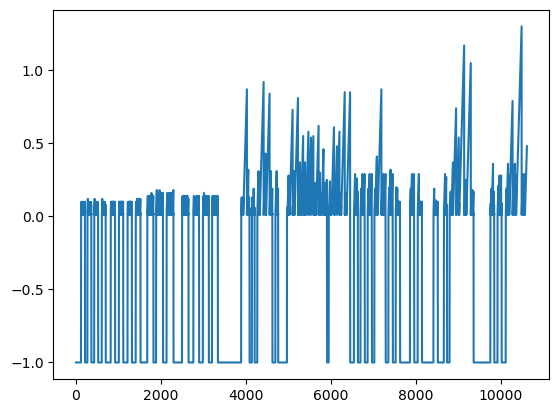

In [6]:
plt.figure()
plt.plot(L)
plt.show()

<AxesSubplot:xlabel='Time'>

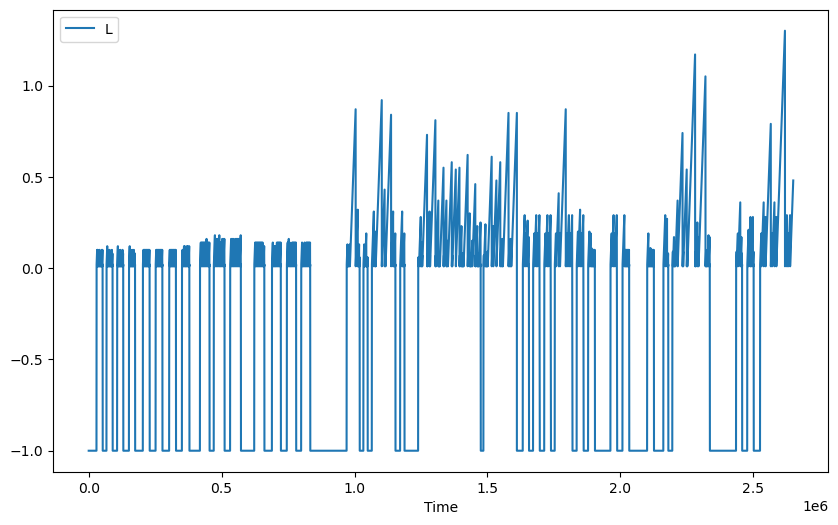

In [7]:
import pandas as pd

df = pd.DataFrame()
df['Time']=TT
df['L']=L


df.plot(x="Time", legend=True, figsize=(10,6))


<AxesSubplot:xlabel='Time'>

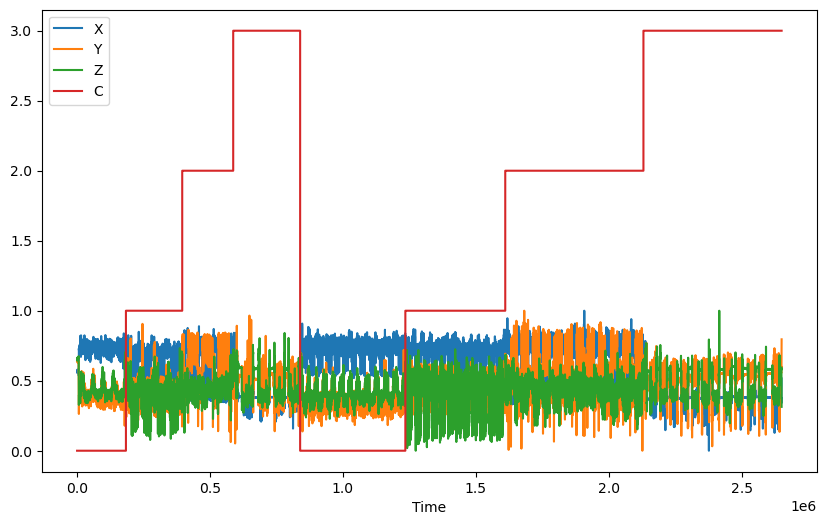

In [8]:
df = pd.DataFrame()
df['Time']=TT
df['X']=X
df['Y']=Y
df['Z']=Z
df['C']=C

df.plot(x="Time", legend=True, figsize=(10,6))

In [9]:
from keras.utils import to_categorical
C0=to_categorical(C)

In [10]:
XYZ=[]
Yclass=[]
for i in range(0,N):
    if(L[i]<0):
        continue
    print("i:",i)
    x1=[]
    y1=[]
    z1=[]
    for it in winIndSize:
        x1.append(X[i+it])
        y1.append(Y[i+it])
        z1.append(Z[i+it])
    xi=[]
    print("x1",x1)
    xi.append(x1)
    xi.append(y1)
    xi.append(z1)
    XYZ.append(np.transpose(xi))
    Yclass.append(C0[i])
XYZ=np.array(XYZ)
Yclass=np.array(Yclass)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
print(XYZ.shape)
print(Yclass.shape)   

(6325, 40, 3)
(6325, 4)


TRAIN: [   1    2    3 ... 6322 6323 6324] TEST: [   0   13   22   26   35   41   49   66   73   76   93  101  109  110
  111  127  146  151  189  195  203  210  223  228  231  249  259  265
  275  288  299  305  317  318  327  333  335  351  353  357  401  421
  438  446  458  466  470  478  496  502  522  525  552  570  576  577
  598  622  636  641  651  656  659  666  692  706  740  748  758  759
  788  793  801  803  808  811  820  823  826  829  833  836  839  860
  896  909  914  932  938  940  941  944  976  981  982  984  996 1028
 1031 1032 1041 1043 1044 1051 1053 1062 1065 1066 1074 1078 1095 1100
 1103 1119 1121 1124 1126 1134 1136 1138 1151 1156 1167 1191 1192 1208
 1209 1220 1229 1247 1253 1259 1274 1275 1285 1293 1295 1299 1300 1304
 1306 1310 1311 1319 1334 1343 1344 1352 1367 1410 1427 1438 1440 1456
 1458 1474 1477 1479 1509 1512 1580 1594 1611 1613 1615 1623 1630 1633
 1643 1647 1658 1659 1695 1712 1716 1722 1725 1730 1735 1763 1779 1787
 1792 1805 1808 1815 1818 18

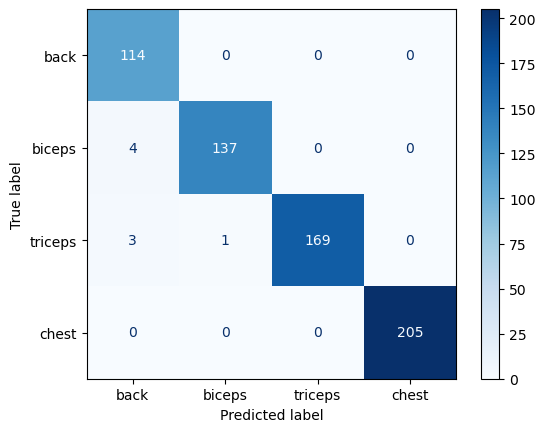

TRAIN: [   0    1    2 ... 6322 6323 6324] TEST: [  10   12   14   37   53   54   59   81   82   99  107  108  143  208
  216  234  243  247  261  296  319  345  373  382  385  387  390  394
  397  415  441  473  475  480  493  499  509  512  513  519  541  548
  551  558  571  587  596  614  624  625  627  646  676  690  702  717
  721  728  729  749  768  789  791  814  817  831  844  849  854  856
  861  865  897  907  919  920  931  947  948  955  971  985  986  988
 1069 1099 1101 1109 1129 1133 1135 1139 1172 1193 1202 1207 1211 1228
 1233 1239 1240 1251 1263 1272 1282 1286 1313 1314 1324 1362 1365 1374
 1375 1390 1395 1402 1403 1413 1414 1426 1437 1446 1449 1450 1462 1483
 1489 1491 1519 1522 1529 1562 1563 1572 1578 1589 1598 1601 1616 1622
 1655 1656 1660 1666 1670 1671 1674 1682 1693 1694 1697 1699 1701 1711
 1715 1723 1733 1741 1746 1774 1795 1800 1803 1807 1831 1832 1847 1852
 1856 1865 1878 1879 1894 1896 1910 1917 1926 1937 1949 1966 1970 1992
 1995 1998 2003 2005 2008 20

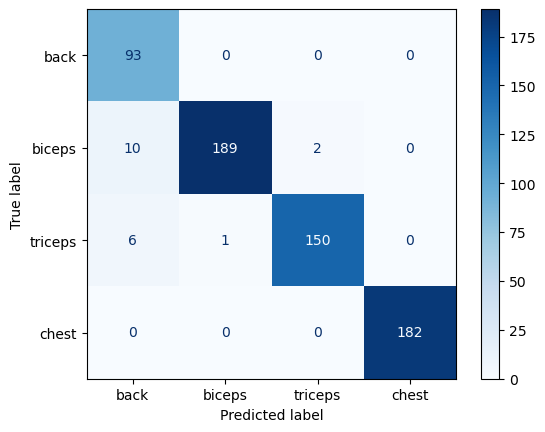

TRAIN: [   0    1    2 ... 6322 6323 6324] TEST: [  11   21   24   55   65   91  118  144  168  171  175  192  197  200
  218  256  286  295  298  300  308  310  313  320  321  323  350  354
  360  395  399  402  409  416  417  435  442  445  453  472  495  497
  523  550  554  555  557  567  572  573  574  586  602  604  612  616
  619  633  640  660  669  677  683  687  696  700  703  707  711  732
  752  754  757  785  794  796  825  855  866  875  879  888  895  930
  943  951  967  978 1002 1008 1018 1023 1024 1027 1045 1094 1117 1143
 1161 1165 1168 1180 1187 1200 1201 1204 1214 1217 1223 1245 1266 1276
 1278 1296 1328 1335 1336 1349 1350 1351 1355 1356 1370 1385 1394 1400
 1405 1407 1408 1423 1441 1485 1488 1517 1527 1536 1569 1573 1582 1591
 1596 1606 1619 1621 1638 1651 1692 1707 1709 1713 1720 1726 1737 1739
 1740 1758 1767 1789 1791 1801 1810 1825 1845 1886 1887 1889 1900 1907
 1909 1916 1927 1933 1943 1945 1965 1977 1978 1985 2002 2011 2014 2017
 2033 2034 2036 2044 2067 20

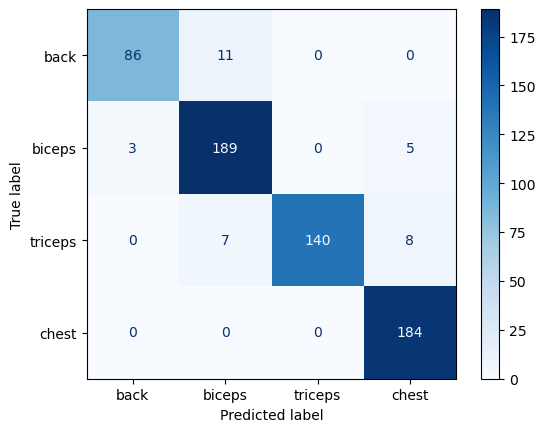

TRAIN: [   0    1    2 ... 6322 6323 6324] TEST: [   5   19   33   38   60   61   67   72   87   89   94   95  100  117
  119  121  125  135  138  145  150  164  165  167  170  172  173  180
  191  193  198  217  229  238  248  250  258  260  264  271  276  297
  306  342  347  348  358  362  365  367  369  371  374  375  392  404
  405  426  432  437  440  448  455  456  460  467  474  488  489  494
  501  504  526  534  545  546  549  556  560  563  582  594  613  652
  653  663  691  698  699  738  765  769  773  774  787  804  821  827
  835  859  871  874  880  903  911  917  924  933  957  973  974  977
  980  993  994 1000 1007 1009 1011 1030 1034 1036 1038 1046 1052 1071
 1076 1083 1115 1125 1131 1137 1145 1153 1176 1181 1203 1225 1231 1238
 1256 1265 1273 1292 1301 1325 1329 1330 1333 1342 1353 1412 1415 1421
 1445 1447 1467 1481 1505 1521 1523 1526 1530 1542 1550 1570 1584 1600
 1605 1608 1625 1657 1669 1673 1676 1683 1708 1719 1721 1727 1729 1731
 1736 1753 1756 1761 1762 17

In [ ]:
from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv1D, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D
from tensorflow.keras.models import Model

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from keras.losses import mean_squared_error

from keras import backend as K

from sklearn.model_selection import KFold


#Dividimos los datos en K fold para cross validation
#kf = KFold(n_splits=10,shuffle=True)
kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits(XYZ)

Y_pred_total=np.array([])
Y_val_total=np.array([])

for train_index, test_index in kf.split(XYZ):
    #Datos de train y test
    print("TRAIN:", train_index, "TEST:", test_index)
    XYZ_train, XYZ_test = XYZ[train_index], XYZ[test_index]
    Yclass_train, Yclass_test = Yclass[train_index], Yclass[test_index]

    
    model = keras.Sequential()

    model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(XYZ.shape[1],XYZ.shape[2])))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

    model.add(Dropout(0.25))
    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(0.25))
    model.add(LSTM(256))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Dense(512))
    model.add(Dense(4, activation="softmax"))

    model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
    model.summary()



    history = model.fit(XYZ_train , Yclass_train,
                    batch_size=64,
            validation_data=(XYZ_test , Yclass_test),
            epochs=7)
    
    

    
    y_pred = model.predict(XYZ_test).argmax(axis=1)
    Yclass_test=Yclass_test.argmax(axis=1)
    print(y_pred)
    print(Yclass_test)

    try:
        cm = confusion_matrix(Yclass_test, y_pred) 
        print(cm)
        print('Classification Report SCENE ')
        print(classification_report(Yclass_test, y_pred,target_names=name_classes))

        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=name_classes)

        disp.plot(cmap=plt.cm.Blues)
        plt.show()
    except:
        print("Not same clases!!")



    Y_pred_total=np.concatenate((Y_pred_total,y_pred))
    Y_val_total=np.concatenate((Y_val_total,Yclass_test))

In [ ]:
print(Y_pred_total)
print(Y_val_total)

cm = confusion_matrix(Y_val_total, Y_pred_total) 
print(cm)
print('Classification Report TOTAL')
print(classification_report(Y_val_total, Y_pred_total, target_names=name_classes))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=name_classes)

disp.plot(cmap=plt.cm.Blues)
plt.show()